In [39]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [40]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [41]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [42]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [43]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [44]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [45]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [46]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [49]:
# Find the most recent date in the data set.
most_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent

('2017-08-23',)

In [231]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
last_year = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= last_year).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precipitation, columns=['Date','Precipitation'])
precip_df.set_index('Date', inplace=True)

# Sort the dataframe by date
precip_df.sort_values("Date") # but they're already sorted???

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.08
2017-08-23,0.00


In [237]:
y_axis = np.arange(0,max(precip_df["Precipitation"]))
y_tick_location = [value for value in y_axis]

# x_axis = np.arange(min(precip_df['Date'], max(precip_df['Date'])))
# x_tick_location = [value for value in x_axis]

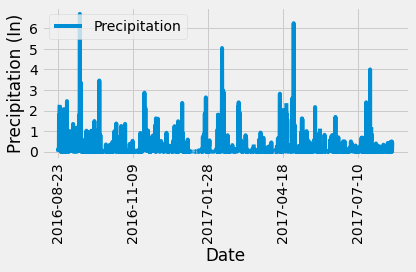

In [240]:
# Use Pandas Plotting with Matplotlib to plot the data

ax1=precip_df.plot()
ax1.set_ylabel("Precipitation (In)")

plt.yticks(y_tick_location)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [243]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary_statistics = precip_df.groupby("Date").agg(['mean', 'median', 'var', 'std', 'sem'])["Precipitation"]

print(summary_statistics.head())
print('---------------------------')
print(precip_df.describe())

# idk which one to use ??

                mean  median       var       std       sem
Date                                                      
2016-08-23  0.451667   0.100  0.499097  0.706468  0.288414
2016-08-24  1.555000   1.800  0.706510  0.840541  0.343150
2016-08-25  0.077143   0.080  0.005157  0.071813  0.027143
2016-08-26  0.016667   0.015  0.000267  0.016330  0.006667
2016-08-27  0.064000   0.020  0.006680  0.081731  0.036551
---------------------------
       Precipitation
count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000


# Exploratory Station Analysis

In [80]:
# Design a query to calculate the total number stations in the dataset
session.query(func.distinct(Measurement.station)).count()

9

In [121]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_station= session.query(func.count(Measurement.station),Measurement.station).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

active_station

[(2772, 'USC00519281'),
 (2724, 'USC00519397'),
 (2709, 'USC00513117'),
 (2669, 'USC00519523'),
 (2612, 'USC00516128'),
 (2202, 'USC00514830'),
 (1979, 'USC00511918'),
 (1372, 'USC00517948'),
 (511, 'USC00518838')]

In [143]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

calculation = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station == "USC00519281").all()

for calc in calculation:
    print(F"Min: {calc[0]}, Max: {calc[1]}, Average: {calc[2]}")

Min: 54.0, Max: 85.0, Average: 71.66378066378067


In [175]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

latest_date = session.query(Measurement.date).\
    filter(Measurement.station == "USC00519281").\
    order_by(Measurement.date.desc()).first()

year_ago = dt.date(2017,8,18) - dt.timedelta(days=365)

twelve_months = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == "USC00519281").\
    filter(Measurement.date >= year_ago).\
    order_by(Measurement.date).all()

station_df = pd.DataFrame(twelve_months, columns=['Frequency','Temperature'])
station_df.set_index('Frequency', inplace=True)

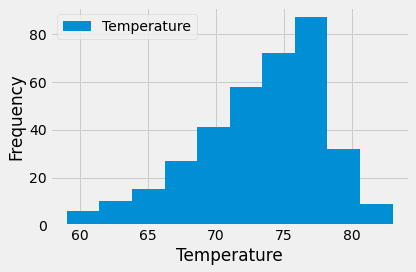

In [189]:
# make histogram
ax = station_df.plot.hist()
ax.set_xlabel("Temperature")
ax.set_ylabel("Frequency")
plt.tight_layout()
plt.show()

# Close session

In [ ]:
# Close Session
session.close()